IMPORTAR DEPENDENCIAS


In [148]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt #importar o matplotlib.pyplot para os gráficos como plt

IMPORTAR CSV + PRERARAR DATAFRAME

In [149]:
data = pd.read_csv('data.csv') #ler o conjunto de dados 
df = pd.DataFrame(data)
df.head()

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
0,2009,Arcos de Valdevez,1601,23 185,49,33,24,6,3,1,0,1,2,2,4,5,4,3,4,25,6
1,2009,Caminha,1602,16 829,29,19,22,5,2,0,0,1,2,2,3,4,4,2,4,15,3
2,2009,Melgaço,1603,9 356,26,17,20,5,2,0,0,1,2,2,3,4,3,2,3,14,3
3,2009,Monção,1604,19 404,13,9,10,2,1,0,0,0,1,1,1,2,2,1,2,7,2
4,2009,Paredes de Coura,1605,9 267,7,5,5,1,1,0,0,0,1,1,1,1,1,1,1,4,1


APOS IMPORTAR DF --> NOVO DATAFRAME SO COM COIMBRA E MOSTRAMOS

In [150]:
coimbra = data[data.codigo_municipio == 603] #mostrar apenas os dados referentes ao município de Coimbra
coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144 301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143 589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141 360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139 151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136 964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135 592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134 578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134 348,(R) 342,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2575,2017,Coimbra,603,134 156,(R) 321,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2883,2018,Coimbra,603,133 724,(R) 276,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!


Substituimos os #VALUE por non values "NaN"

In [151]:
df.replace("#VALUE!", np.nan, inplace=True) #trocamos os valores #VALUE! por NaN values 
df.replace(" ", np.nan, inplace=True) #trocamos os campos vazios por NaN values e retira os espaços entre números com mais de 4 digitos  
coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144 301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143 589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141 360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139 151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136 964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135 592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134 578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134 348,(R) 342,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2575,2017,Coimbra,603,134 156,(R) 321,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2883,2018,Coimbra,603,133 724,(R) 276,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!


Removemos caracteres especiais que estavam nos dados para limpeza de dados

In [152]:
df['num_crimes'] = df['num_crimes'].replace(to_replace=['\(R\)', ' ', '-', '┴'], value='', regex=True) #removemos os caracteres especiais na coluna num_crimes  
df['num_habitantes'] = df['num_habitantes'].replace(to_replace=['\(R\)', ' ', '-', '┴'], value= '', regex=True) #removemos os caracteres especiais na coluna num_habitantes 

df.dropna() #remove os missing values presentes no num_crimes e num_habitantes 
coimbra = df[df.codigo_municipio == 603]
coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134348,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,2017,Coimbra,603,134156,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883,2018,Coimbra,603,133724,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dados referentes ao município de Coimbra

In [153]:
coimbracasos = coimbra['num_crimes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_crimes
coimbra_hab = coimbra['num_habitantes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_habitantes
vit_fem = coimbra['num_vitima_feminina'].astype(float) #passamos os dados do tipo objeto para float na coluna num_vitima_feminina
vit_mas = coimbra['num_vitima_masculina'].astype(float)#passamos os dados do tipo objeto para float na coluna num_vitima_masculina
vit_trx = coimbra['num_vitima_intersexo'].astype(float)#passamos os dados do tipo objeto para float na coluna num_vitima_intersexo

*Substituição das colunas NaN de vítimas masculinas, femininas e intersex pela média da própria coluna*

In [154]:
vit_fem.fillna(vit_fem.mean(), inplace=True)
vit_mas.fillna(vit_mas.mean(), inplace=True)
vit_trx.fillna(vit_trx.mean(), inplace=True)

In [155]:
#dataframe apenas com as colunas a ser utilizadas para análise da evolução/comparação no distrito de Coimbra
pd.DataFrame(coimbra, columns=["ano", "municipio", "num_crimes", "num_vitimas", "num_vitima_feminina", "num_vitima_masculina", "num_vitima_intersexo"])

,ano,municipio,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo
111,2009,Coimbra,356,237,267,64,28
419,2010,Coimbra,346,230,260,62,28
727,2011,Coimbra,372,247,279,67,30
1035,2012,Coimbra,365,243,274,66,29
1343,2013,Coimbra,385,256,289,69,31
1651,2014,Coimbra,394,262,296,71,32
1959,2015,Coimbra,356,237,267,64,28
2267,2016,Coimbra,342,NaN,NaN,NaN,NaN
2575,2017,Coimbra,321,NaN,NaN,NaN,NaN
2883,2018,Coimbra,276,NaN,NaN,NaN,NaN


In [156]:
soma_casoscoimbra = coimbracasos.sum() #soma da totalidade de casos no distrito de Coimbra, desde 2009 até 2019
media_casoscoimbra = coimbracasos.mean() #média de casos (na sua totalidade) no distrito de Coimbra, desde 2009 até 2019
media_vit_fem = vit_fem.mean() #média de casos do sexo feminino no distrito de Coimbra, desde 2009 até 2019  
media_vit_mas = vit_mas.mean() #média de casos do sexo masculino no distrito de Coimbra, desde 2009 até 2019 
media_vit_trx = vit_trx.mean() #média de casos intersexoo no distrito de Coimbra, desde 2009 até 2019 


print("Soma de casos em Coimbra: ", soma_casoscoimbra) 
print("Media de casos em Coimbra: ", media_casoscoimbra) 
print("Media de casos do sexo Feminino em Coimbra: ", media_vit_fem) 
print("Media de casos do sexo Masculino em Coimbra: ", media_vit_mas) 
print("Media de casos Intersexo em Coimbra: ", media_vit_trx) 


Soma de casos em Coimbra:  3777.0
Media de casos em Coimbra:  343.3636363636364
Media de casos do sexo Feminino em Coimbra:  266.25
Media de casos do sexo Masculino em Coimbra:  63.875
Media de casos Intersexo em Coimbra:  28.375


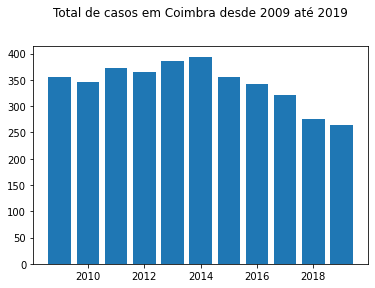

In [157]:
plt.bar(coimbra['ano'], coimbracasos) #gráfico de barras com os total de casos em Coimbra por ano 
#eixo do x são os anos (desde 2009 a 2019) e o eixo do y é o número total de casos 
plt.title('Total de casos em Coimbra desde 2009 até 2019',pad= 30)
plt.show()

In [158]:
coimbracasos.max() #número máximo de casos em Coimbra 

394.0

In [159]:
coimbracasos.min() #número mínimo de casos em Coimbra 

264.0

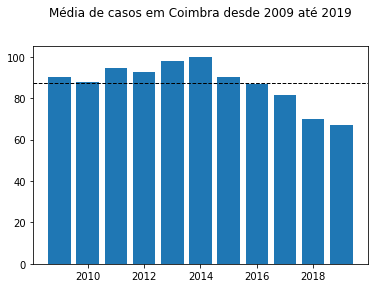

In [160]:
#plt.plot(coimbra['ano'], coimbracasos)
plt.bar(coimbra['ano'], coimbracasos / coimbracasos.max() * 100) #percentagem da média de casos para cada ano
plt.axhline(y=coimbracasos.mean() / coimbracasos.max() * 100, color='k', linestyle='dashed', linewidth=1) #linha que representa a média de casos de todos os anos em Coimbra (em percentagem)
plt.title('Média de casos em Coimbra desde 2009 até 2019',pad= 30)
plt.show()

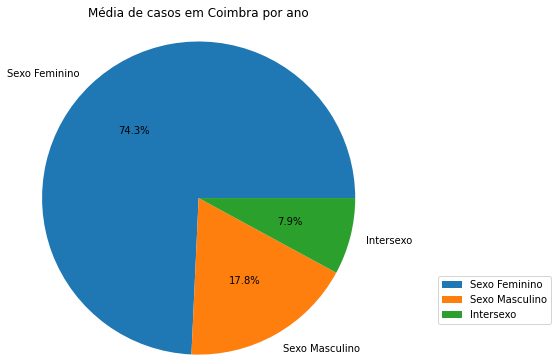

In [161]:
%matplotlib inline
labels = ['Sexo Feminino', 'Sexo Masculino', 'Intersexo']
mediaCasos=[media_vit_fem, media_vit_mas, media_vit_trx] #médias referentes aos casos do sexo feminino, masculino e intersexo, respetivamente
plt.axis("equal")
plt.pie(mediaCasos, labels=labels, autopct='%1.1f%%', radius =1.8) #características da vizualização do gráfico 
plt.legend(loc='lower left',bbox_to_anchor=(1.2,-0.1)) #localização da legenda do gráfico 
plt.title('Média de casos em Coimbra por ano',pad= 73) #título do gráfico 
total=plt.show() 
total

# Dados referentes ao município de Lisboa 

In [162]:
lisboa = df[df.codigo_municipio == 1106] #mostra apenas os dados referentes ao município de Lisboa 
lisboa_hab = lisboa['num_habitantes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_habitantes
lisboacasos = lisboa['num_crimes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_crimes

In [163]:
#dataframe apenas com as colunas a ser utilizadas para análise da evolução/comparação no distrito de Lisboa
pd.DataFrame(lisboa, columns=["ano", "municipio", "num_crimes", "num_vitimas", "num_vitima_feminina", "num_vitima_masculina", "num_vitima_intersexo"])

,ano,municipio,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo
191,2009,Lisboa,1383,919,1037,249,111
499,2010,Lisboa,1371,911,1028,247,110
807,2011,Lisboa,1388,923,1041,250,111
1115,2012,Lisboa,1224,814,918,220,98
1423,2013,Lisboa,1464,NaN,NaN,NaN,NaN
1731,2014,Lisboa,1497,995,1123,269,120
2039,2015,Lisboa,1408,936,1056,253,113
2347,2016,Lisboa,1482,NaN,NaN,NaN,NaN
2655,2017,Lisboa,1490,NaN,NaN,NaN,NaN
2963,2018,Lisboa,1334,NaN,NaN,NaN,NaN


In [164]:
soma_lisboacasos = lisboacasos.sum() #soma da totalidade de casos no distrito de Lisboa, desde 2009 até 2019
media_lisboacasos = lisboacasos.mean() #média de casos (na sua totalidade) no distrito de Lisboa, desde 2009 até 2019

print("Soma de casos em Lisboa: ", soma_lisboacasos) 
print("Media de casos em Lisboa: ", media_lisboacasos, "por ano") 

Soma de casos em Lisboa:  15592.0
Media de casos em Lisboa:  1417.4545454545455 por ano


# Dados referentes ao município do Porto

In [165]:
porto = df[df.codigo_municipio == 1312] #mostra apenas os dados referentes ao município do Porto
porto_hab = porto['num_habitantes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_habitantes
portocasos = porto['num_crimes'].astype(float) #passamos os dados do tipo objeto para float na coluna num_crimes

In [166]:
#dataframe apenas com as colunas a ser utilizadas para análise da evolução/comparação no distrito do Porto
pd.DataFrame(porto, columns=["ano", "municipio", "num_crimes", "num_vitimas", "num_vitima_feminina", "num_vitima_masculina", "num_vitima_intersexo"])


,ano,municipio,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo
31,2009,Porto,1223,813,917,220,98
339,2010,Porto,1228,816,921,221,98
647,2011,Porto,1277,849,958,230,102
955,2012,Porto,1006,669,755,181,80
1263,2013,Porto,937,623,703,169,75
1571,2014,Porto,905,602,679,163,72
1879,2015,Porto,806,536,605,145,64
2187,2016,Porto,775,NaN,NaN,NaN,NaN
2495,2017,Porto,730,NaN,NaN,NaN,NaN
2803,2018,Porto,630,NaN,NaN,NaN,NaN


In [167]:
soma_portocasos = portocasos.sum() #soma da totalidade de casos no distrito do Porto, desde 2009 até 2019
media_portocasos = portocasos.mean() #média de casos (na sua totalidade) no distrito do Porto, desde 2009 até 2019

print("Soma de casos no Porto: ", soma_portocasos) 
print("Media de casos no Porto: ", media_portocasos, "por ano")

Soma de casos no Porto:  10261.0
Media de casos no Porto:  932.8181818181819 por ano


# Comparação da totalidade de casos, discriminados por sexo, ao longo do tempo

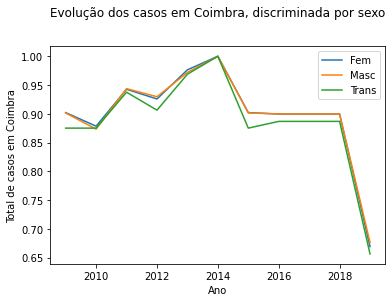

In [168]:
plt.plot(coimbra['ano'], vit_fem / vit_fem.max()) 
plt.plot(coimbra['ano'], vit_mas / vit_mas.max()) 
plt.plot(coimbra['ano'], vit_trx / vit_trx.max())
#normalização dos dados - multiplicamos por 4 (vit_mas) e por 10 (vit_trx) na tentativa de normalizar os valores, para que seja possível ver a evolução e efetuar a comparação com o sexo feminino, visto que o seu número de casos é bastante superior a estes dois 

plt.legend(['Fem', 'Masc','Trans'])
plt.xlabel('Ano')
plt.ylabel('Total de casos em Coimbra')
plt.title('Evolução dos casos em Coimbra, discriminada por sexo',pad= 30)
plt.show()
#legenda do gráfico

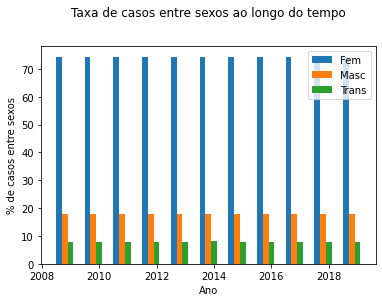

In [169]:
plt.bar(coimbra['ano'] - 0.4, vit_fem / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx') #percentagem do total de casos do sexo feminino em cada ano 
plt.bar(coimbra['ano'] - 0.2, vit_mas / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx') #percentagem do total de casos do sexo masculino em cada ano 
plt.bar(coimbra['ano'] + 0.0, vit_trx / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx') #percentagem do total de casos intersexo em cada ano 
#os valores -0.4, -0.2 e 0.o são referentes à distância entre cada barra (para não ficarem sobrepostas) 
#os valores 0.2 correspondem à largura de cada barra 

plt.legend(['Fem', 'Masc','Trans'])
plt.xlabel('Ano')
plt.ylabel('% de casos entre sexos')
plt.title('Taxa de casos entre sexos ao longo do tempo',pad= 30) #do total de casos, quantos (em percentagem) são do sexo feminino, masculino e intersexo
plt.show()

# Comparação da totalidade de casos em Coimbra, Porto e Lisboa, ao longo do tempo

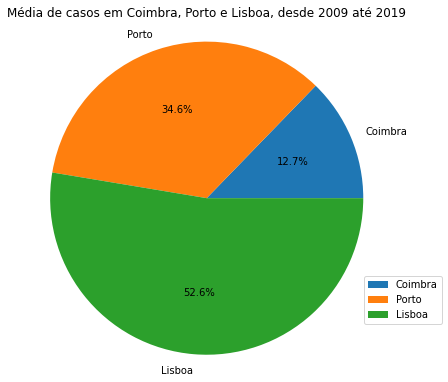

In [170]:
%matplotlib inline
labels = ['Coimbra', 'Porto', 'Lisboa']
mediaCasos=[media_casoscoimbra, media_portocasos, media_lisboacasos] #médias referentes ao total de casos em Coimbra, Porto e Lisboa, respetivamente
plt.pie(mediaCasos, labels=labels, autopct='%1.1f%%', radius =1.8) #características da vizualização do gráfico 
plt.legend(loc='lower left',bbox_to_anchor=(1.2,-0.1)) #localização da legenda do gráfico 
plt.title('Média de casos em Coimbra, Porto e Lisboa, desde 2009 até 2019',pad= 73) #título do gráfico 
total=plt.show() 
total

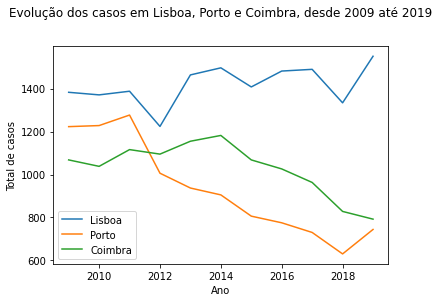

In [171]:
plt.plot(lisboa['ano'], lisboacasos) #total de casos em Lisboa ao longo do tempo
plt.plot(porto['ano'], portocasos) #total de casos no Porto ao longo do tempo
plt.plot(coimbra['ano'], coimbracasos * 3) #total de casos em Coimbra ao longo do tempo
plt.legend(['Lisboa', 'Porto','Coimbra'])
plt.xlabel('Ano')
plt.ylabel('Total de casos')
plt.title('Evolução dos casos em Lisboa, Porto e Coimbra, desde 2009 até 2019',pad= 30)
plt.show()

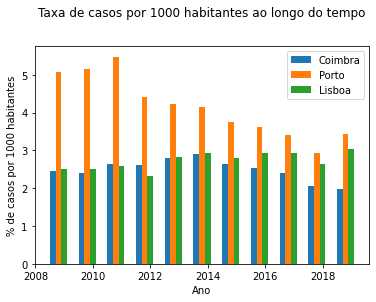

In [172]:
plt.bar(coimbra['ano'] - 0.4, coimbracasos / coimbra_hab * 1000, 0.2, label = 'xx') #percentagem de casos por 1000 habitantes em Coimbra
plt.bar(porto['ano'] - 0.2, portocasos / porto_hab * 1000, 0.2, label = 'xx') #percentagem de casos por 1000 habitantes no Porto
plt.bar(lisboa['ano'] + 0.0, lisboacasos / lisboa_hab * 1000, 0.2, label = 'xx') #percentagem de casos por 1000 habitantes em Lisboa 
#os valores -0.4, -0.2 e 0.o são referentes à distância entre cada barra (para não ficarem sobrepostas) 
#os valores 0.2 correspondem à largura de cada barra 

plt.legend(['Coimbra', 'Porto','Lisboa'])
plt.xlabel('Ano')
plt.ylabel('% de casos por 1000 habitantes')
plt.title('Taxa de casos por 1000 habitantes ao longo do tempo',pad= 30)
plt.show()